In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report ,precision_score , recall_score , f1_score , make_scorer , confusion_matrix
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split , GridSearchCV ,train_test_split
from sklearn.tree import export_graphviz
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus


In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

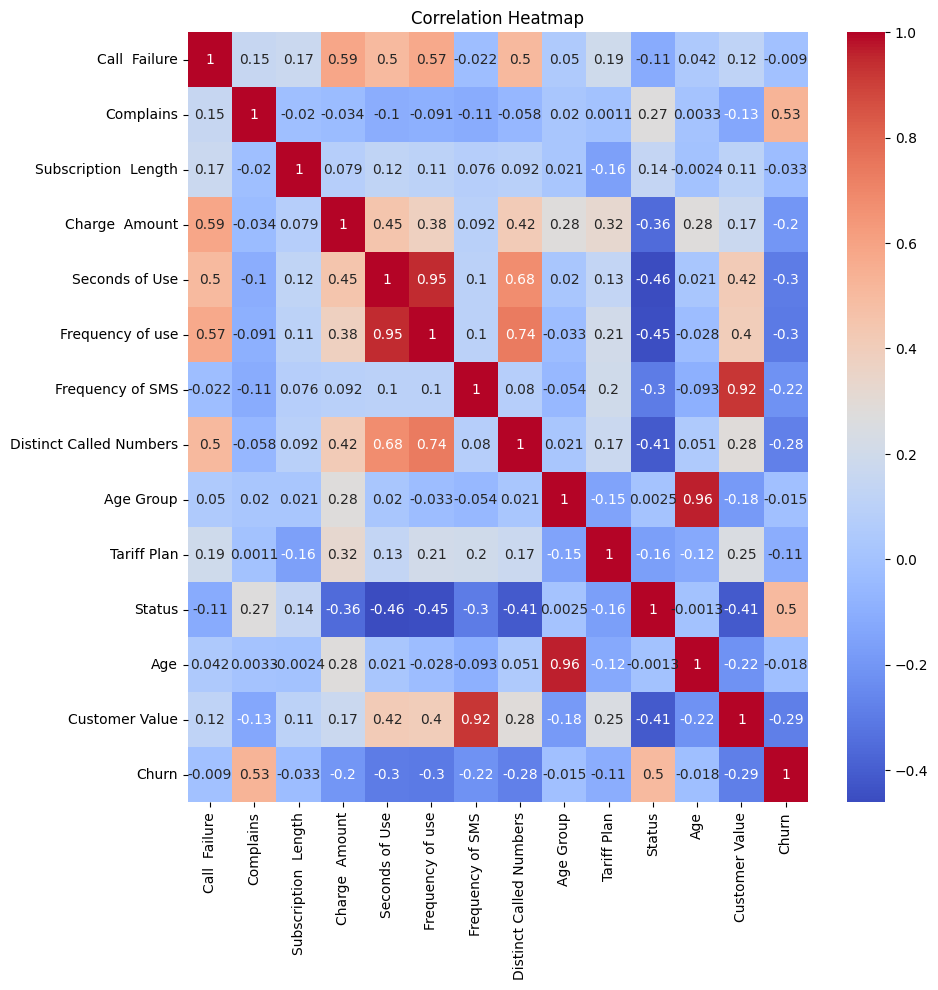

In [4]:
correlation = df.corr()

# Create a new figure for the plot
plt.figure(figsize=(10, 10))

# Create heatmap
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [5]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = rf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9397


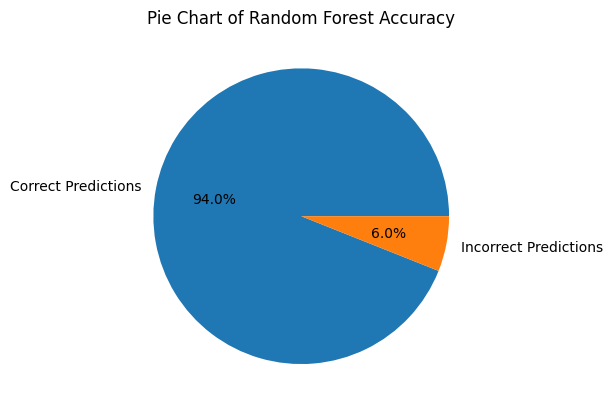

In [8]:
pie_chart_slice_labels = ['Correct Predictions', 'Incorrect Predictions']
pie_chart_slice_values = [accuracy, 1 - accuracy]
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Random Forest Accuracy")
plt.show()

**As we can see from the above out put our model is showing 93% of Accuracy this happen may be due to overfiting so let's modify the hyperparameters and see the changes**

In [9]:
# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=300,random_state=42,max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=42)

In [10]:
y_pred = rf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8683


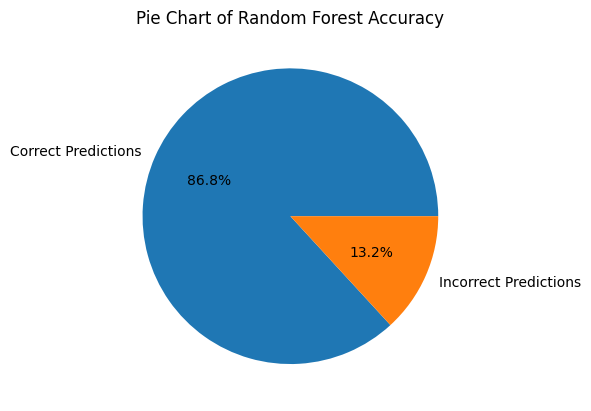

In [11]:
pie_chart_slice_labels = ['Correct Predictions', 'Incorrect Predictions']
pie_chart_slice_values = [accuracy, 1 - accuracy]
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Random Forest Accuracy")
plt.show()

**After changeing the hyperparameters now our accuracy is 86%**

In [12]:

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
# Print classification report (optional)
print(classification_report(y_test, y_pred))

Precision: 0.8462
Recall: 0.3000
F1-Score: 0.4430
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       520
           1       0.85      0.30      0.44       110

    accuracy                           0.87       630
   macro avg       0.86      0.64      0.68       630
weighted avg       0.87      0.87      0.84       630



In [13]:
scoring = 'accuracy'

# Perform cross-validation with k-folds (e.g., 5 folds)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring=scoring)

# Print the cross-validation scores and their mean
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.9015873  0.88095238 0.89206349 0.8984127  0.9015873 ]
Mean Cross-Validation Score: 0.8949


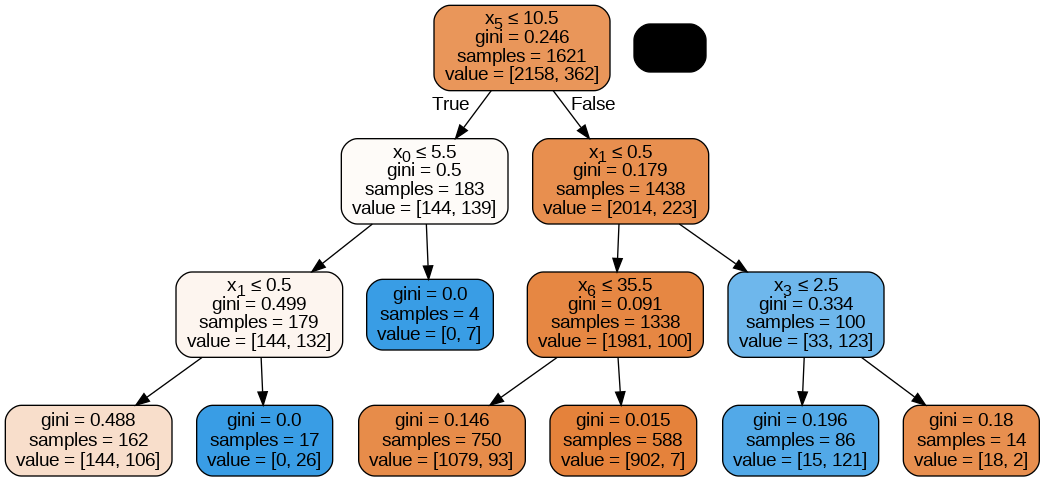

In [14]:
estimator_index = 0
estimator = rf.estimators_[estimator_index]

# Export the tree to a DOT object
dot_data = export_graphviz(estimator, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph object from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('forest_sample_tree.png')
Image(filename='forest_sample_tree.png')

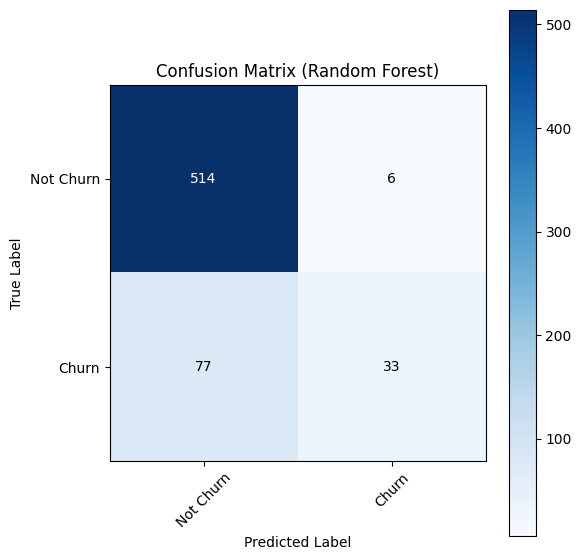

In [15]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap='Blues')
plt.colorbar()

# Add labels and title
classes = ['Not Churn', 'Churn']  # Adjust class names if needed
plt.xticks(range(len(classes)), classes, rotation=45)
plt.yticks(range(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')

# Add text for each cell (optional)
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.grid(False)
plt.tight_layout()
plt.show()